# 1. Connect to github classroom

Some of the assignments in this unit will be managed via GitHub classroom. Please follow these steps to connect:

1. Follow this invitation link and accept the invitation: https://classroom.github.com/a/ClEXFjvs
2. The link may ask you to sign in to GitHub (if you haven't signed in earlier). If you don't have a GitHub account, you will need to register.
3. Once you have logged in with GitHub, you may need to select your email address to associate your GitHub account with your email address (if you haven't done it in a previous COMP3420 activity). If you can't find your email address, please skip this step and contact diego.molla-aliod@mq.edu.au so that he can do the association manually.
4. Wait a minute or two, and refresh the browser until it indicates that your assignment repository has been created. Your repository is private to you, and you have administration privileges. Only you and the lecture will have access to it. The repository will be listed under the list of repositories belonging to this offering of COMP3420: https://github.com/orgs/COMP3420-2023S1/repositories
5. Your assignment repository will include starter code that you can use for the exercises below. Clone your repository into a folder in your computer.

This practical has two kinds of exercises:

1. **Implement functions and upload the implementation to github classroom**. The exercises will have associated automated tests. To run these tests, please commit your changes and push the changes to your repository. This will initiate the automated tests, and you will receive the test results. There are no marks associated with these tests, but they will help you get used to the environment that you will use for the assignments.
2. **Analyse the data, train and evaluate image classifiers.** These exercises do not have automated tests but they will help you practice with the kinds of tasks that you will need to do in assignments 2 and 3.

# 1. Apply image segmentation masks

Below are several exercises that use image masks such as those generated in an image segmentation task.

1. Write a Python function `apply_mask` that takes a colour image stored in 3 RGB channels and an image mask using the trimap format. That is, the mask is a Numpy array with integer values 1, 2, 3. The function will return a new 3-channel colour image that applies the mask so that:
   - All pixels whose corresponding mask is 1 (object) remain unmodified.
   - All pixels whose corresponding mask is 2 (background) have their value 0.
   - All pixels whose corresponding mask is 3 (contour) have their value halved.
   
   Below is an example of execution.

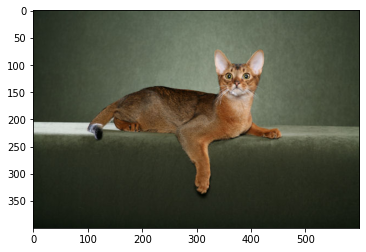

In [1]:
from matplotlib import pyplot as plt

image = plt.imread("Abyssinian_1.jpg")
plt.imshow(image)

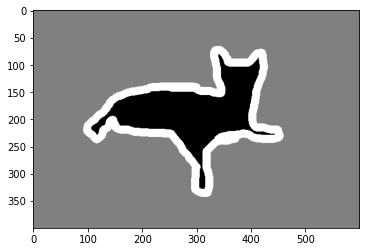

In [2]:
mask = plt.imread("Abyssinian_1.png")
mask = ((mask - mask.min())/(mask.max() - mask.min())*2).astype("uint8") + 1
plt.imshow(mask, cmap="gray")

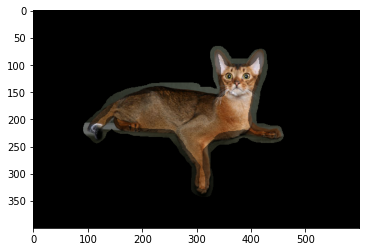

In [3]:
import week5
masked_image = week5.apply_mask(image,mask)
plt.imshow(masked_image)

2. Write a Python function `add_alpha` that takes an image in 3 RGB channels and a trimap mask as described in the previous question, and creates a 4-channel image where the RGB channels are the same as the original image, and the alpha channel is based on the trimap mask so that:
     - If the mask value is 1, the alpha channel value is 255 (opaque content).
     - If the mask value is 2, the alpha channel value is 0 (transparent background).
     - If the mask value is 3, the alpha channel value is 128 (semi-transparent contour).
     
     Below is an example of execution.

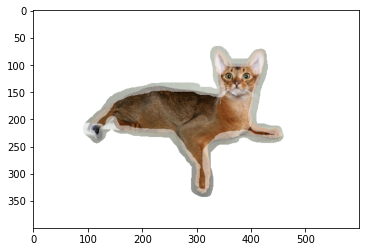

In [4]:
from matplotlib import pyplot as plt
import week5

image = plt.imread("Abyssinian_1.jpg")
mask = plt.imread("Abyssinian_1.png")
mask = ((mask - mask.min())/(mask.max() - mask.min())*2).astype("uint8") + 1
four_channel_image = week5.add_alpha(image,mask)
plt.imshow(four_channel_image)

# 2. Run a pre-trained image segmentation model

Write a function `predict_image_segmentation` that takes an input image and generates a segmentation mask. To generate the segmentation mask, use these saved pre-trained model weights. These weights were generated and saved using the lecture notebook of week 5:
 - [oxford-segmentation.keras](https://drive.google.com/file/d/1edzzqj0HajoNvZ_XCj3UEnjhK2w-ohvu/view?usp=share_link)

 To be able to use the pre-trained model weights, you need to do the following:
 1. Define the model using exactly the same model definition as in the lecture notebook, with the same input image size. The model was defined in the function `get_model`.
 2. Use the Keras function `load_model` to load the pre-trained model weights.
 3. Use the `predict` method as described in the lecture notebook.
 4. Post-process the prediction so that the output conforms to the format specified in task 1 of this practical.

 Below is an example of execution.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
cp drive/MyDrive/Teaching/COMP3420/oxford_segmentation.keras .

1/1 [==============================] - 1s 801ms/step


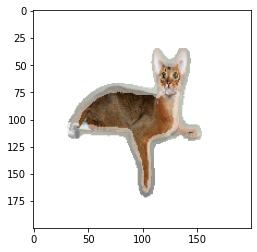

In [8]:
from matplotlib import pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import week5
image = img_to_array(load_img("Abyssinian_1.jpg", target_size=(200,200)))
predicted_mask = week5.predict_image_segmentation(image)
four_channel_image = week5.add_alpha(image, predicted_mask)
plt.imshow(four_channel_image)